In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
import os
import sys
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.utils import shuffle

In [2]:
os.chdir(r'C:\\Users\\91809\\Desktop\\Praxis\\Sem2\\FINANCE\\home-credit-default-risk')
train_data = pd.read_csv('application_train.csv')

In [179]:
os.chdir(r'C:\\Users\\91809\\Desktop\\Praxis\\Sem2\\FINANCE\\home-credit-default-risk')
train_data = pd.read_csv('application_train.csv')
test_data = pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')

In [3]:
#homecredit_columns_description = pd.read_csv('HomeCredit_columns_description.csv')
installments_payments = pd.read_csv('installments_payments.csv')
pos_cash_balance = pd.read_csv('POS_CASH_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
saple_submisstion = pd.read_csv('sample_submission.csv')

In [6]:
train_data.isna().sum().sum()

5584117

In [29]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train_data.shape

(307511, 122)

In [6]:
train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [4]:
# Drop missing data more than 60 %
missingDataDF = pd.DataFrame(train_data.isna().sum()/train_data.shape[0] * 100)
missingData = list(missingDataDF[missingDataDF[0] > 60].index)
train_data.drop(missingData, axis =1 , inplace = True)

In [5]:
missingDataDF = pd.DataFrame(train_data.isna().sum()/train_data.shape[0] * 100)
missingDataDF[missingDataDF[0] > 60]

,0


In [7]:
def get_general_cols_info(data):
    columnsWithMissingData = []
    categoryColumns = []
    numericalColumns = []
    columnNames = data.columns
    #rows = data.shape[0]
    data_notna = data.dropna()
    #sample_rows = int(rows * 0.02)
    for column in columnNames:
        temp = data[column]
        temp1 = data_notna[column]
        if (temp.isna().sum() > 0):
            columnsWithMissingData.append(column)
        #temp = data[column].sample(sample_rows, replace=False)
        if isinstance(temp1.iloc[0], str):
            categoryColumns.append(column)
        elif (len(temp1.unique())/len(temp1) * 100) < 0.05:
            categoryColumns.append(column)
        else:
            numericalColumns.append(column)
    print('Total no of columns:',len(columnNames))        
    print('No. of numerical columns:',len(numericalColumns))
    print('No. of categorical columns:',len(categoryColumns))
    print('No. of columns with missing data:',len(columnsWithMissingData))

    return numericalColumns, categoryColumns, columnsWithMissingData

In [8]:
numericalColumns, categoryColumns, columnsWithMissingData = get_general_cols_info(train_data)

Total no of columns: 105
No. of numerical columns: 47
No. of categorical columns: 58
No. of columns with missing data: 50


In [16]:
# manual inspection of categorical variables
# OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_MON

lst = ['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON']
for l in lst:
    numericalColumns.remove(l)
    categoryColumns.append(l)


In [10]:
def impute_missing_values(data, numericalColumns, categoryColumns,columnsWithMissingData,  inplace=False):
    if inplace == True:
        t_data = data
    else:
        t_data = data.copy()
    #numericalColumns, categoryColumns, columnsWithMissingData = get_general_cols_info(t_data)
    print("Imputing the following columns :")
    for column in columnsWithMissingData:
        print(column)
        temp = t_data[column]
        if column in numericalColumns:
            imputedValue = np.median(temp[temp.notna()])
        if column in categoryColumns:
            imputedValue = stats.mode(temp[temp.notna()])[0][0]
        t_data[column].fillna(imputedValue, inplace = True)
        
    print('No of missing Values in the data :', t_data.isna().sum().sum())
    return t_data

In [11]:
train_data_no_missing = impute_missing_values(train_data, numericalColumns, categoryColumns,columnsWithMissingData, inplace=False)

Imputing the following columns :
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
OCCUPATION_TYPE
CNT_FAM_MEMBERS
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
LANDAREA_AVG
LIVINGAREA_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
LANDAREA_MODE
LIVINGAREA_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
LANDAREA_MEDI
LIVINGAREA_MEDI
NONLIVINGAREA_MEDI
HOUSETYPE_MODE
TOTALAREA_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR
No of missing Values in the data : 0


In [12]:
train_data_no_missing.isna().sum().sum()

0

In [13]:
train_data_no_missing.to_csv('application_train_no_missing_data.csv')

In [14]:
train_data_no_missing = pd.read_csv('application_train_no_missing_data.csv')
train_data_no_missing.head(10)

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
# Flag to represent when Total income is greater than Credit
train_data_no_missing['INCOME_GT_CREDIT_FLAG'] = train_data_no_missing['AMT_INCOME_TOTAL'] > train_data_no_missing['AMT_CREDIT']
# Column to represent Credit Income Percent
train_data_no_missing['CREDIT_INCOME_PERCENT'] = train_data_no_missing['AMT_CREDIT'] / train_data_no_missing['AMT_INCOME_TOTAL']
# Column to represent Annuity Income percent
train_data_no_missing['ANNUITY_INCOME_PERCENT'] = train_data_no_missing['AMT_ANNUITY'] / train_data_no_missing['AMT_INCOME_TOTAL']
# Column to represent Credit Term
train_data_no_missing['CREDIT_TERM'] = train_data_no_missing['AMT_CREDIT'] / train_data_no_missing['AMT_ANNUITY'] 
# Column to represent Days Employed percent in his life
train_data_no_missing['DAYS_EMPLOYED_PERCENT'] = train_data_no_missing['DAYS_EMPLOYED'] / train_data_no_missing['DAYS_BIRTH']
# Shape of Application data
print('The shape of application data:',train_data_no_missing.shape)

The shape of application data: (307511, 110)


## bureau

In [183]:
bureau.isna().sum()/bureau.shape[0] * 100

SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_ENDDATE        6.149573
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM             0.000757
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
AMT_ANNUITY               71.473490
dtype: float64

In [185]:
bureau.drop(['AMT_CREDIT_MAX_OVERDUE','AMT_ANNUITY'], axis=1, inplace=True)

In [225]:
grp = bureau.drop(['SK_ID_BUREAU'], axis = 1).groupby(by=['SK_ID_CURR']).mean().reset_index()
grp.columns = ['BUREAU_'+column if column !='SK_ID_CURR' else column for column in grp.columns]
application_bureau = train_data_no_missing.merge(grp, on='SK_ID_CURR', how='left')
application_bureau.update(application_bureau[grp.columns].fillna(0))

In [226]:
# Number of past loans per customer
grp = bureau.groupby(by = ['SK_ID_CURR'])['SK_ID_BUREAU'].count().reset_index().rename(columns = {'SK_ID_BUREAU': 'BUREAU_LOAN_COUNT'})
application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')
application_bureau['BUREAU_LOAN_COUNT'] = application_bureau['BUREAU_LOAN_COUNT'].fillna(0)

In [227]:
# Number of types of past loans per customer 
grp = bureau[['SK_ID_CURR', 'CREDIT_TYPE']].groupby(by = ['SK_ID_CURR'])['CREDIT_TYPE'].nunique().reset_index().rename(columns={'CREDIT_TYPE': 'BUREAU_LOAN_TYPES'})
application_bureau = application_bureau.merge(grp, on='SK_ID_CURR', how='left')
application_bureau['BUREAU_LOAN_TYPES'] = application_bureau['BUREAU_LOAN_TYPES'].fillna(0)

In [228]:
# Debt over credit ratio 
bureau['AMT_CREDIT_SUM'] = bureau['AMT_CREDIT_SUM'].fillna(0)
bureau['AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)
grp1 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM': 'TOTAL_CREDIT_SUM'})
grp2 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_DEBT']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_DEBT':'TOTAL_CREDIT_SUM_DEBT'})
grp1['DEBT_CREDIT_RATIO'] = grp2['TOTAL_CREDIT_SUM_DEBT']/grp1['TOTAL_CREDIT_SUM']
del grp1['TOTAL_CREDIT_SUM']
application_bureau = application_bureau.merge(grp1, on='SK_ID_CURR', how='left')
application_bureau['DEBT_CREDIT_RATIO'] = application_bureau['DEBT_CREDIT_RATIO'].fillna(0)
application_bureau['DEBT_CREDIT_RATIO'] = application_bureau.replace([np.inf, -np.inf], 0)
application_bureau['DEBT_CREDIT_RATIO'] = pd.to_numeric(application_bureau['DEBT_CREDIT_RATIO'], downcast='float')

In [229]:
# Overdue over debt ratio
bureau['AMT_CREDIT_SUM_OVERDUE'] = bureau['AMT_CREDIT_SUM_OVERDUE'].fillna(0)
bureau['AMT_CREDIT_SUM_DEBT'] = bureau['AMT_CREDIT_SUM_DEBT'].fillna(0)
grp1 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_OVERDUE']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_OVERDUE'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_OVERDUE': 'TOTAL_CUSTOMER_OVERDUE'})
grp2 = bureau[['SK_ID_CURR','AMT_CREDIT_SUM_DEBT']].groupby(by=['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename(columns={'AMT_CREDIT_SUM_DEBT':'TOTAL_CUSTOMER_DEBT'})
grp1['OVERDUE_DEBT_RATIO'] = grp1['TOTAL_CUSTOMER_OVERDUE']/grp2['TOTAL_CUSTOMER_DEBT']
del grp1['TOTAL_CUSTOMER_OVERDUE']
application_bureau = application_bureau.merge(grp1, on='SK_ID_CURR', how='left')
application_bureau['OVERDUE_DEBT_RATIO'] = application_bureau['OVERDUE_DEBT_RATIO'].fillna(0)
application_bureau['OVERDUE_DEBT_RATIO'] = application_bureau.replace([np.inf, -np.inf], 0)
application_bureau['OVERDUE_DEBT_RATIO'] = pd.to_numeric(application_bureau['OVERDUE_DEBT_RATIO'], downcast='float')

## Credit Card Balance 

In [230]:
# Combining numerical features
grp = credit_card_balance.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['CREDIT_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
application_bureau_Credit = application_bureau.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_bureau_Credit.update(application_bureau_Credit[grp.columns].fillna(0))

In [193]:
application_bureau.shape

(307511, 115)

In [18]:
#numericalColumns, categoryColumns, columnsWithMissingData = get_general_cols_info(train_data_no_missing)

Total no of columns: 106
No. of numerical columns: 36
No. of categorical columns: 70
No. of columns with missing data: 0


In [231]:
# Trying with new generated data
numericalColumns, categoryColumns, columnsWithMissingData = get_general_cols_info(application_bureau_Credit)

Total no of columns: 144
No. of numerical columns: 70
No. of categorical columns: 74
No. of columns with missing data: 0


In [59]:
train_data_no_missing

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
numericalColumns.remove('Unnamed: 0')

## WOE and IV values 

In [60]:
def get_bin_data_continious_attributes(data, numericalAttributes):
    bin_data = pd.DataFrame()
    nbins = 10
    print('Binning columns name :')
    for column in numericalAttributes:
        sys.stdout.write(column + ' , ')
        bin_data[column] = pd.qcut(data[column],10, duplicates='drop')
    print('Completed Binning ..')
    return bin_data

In [65]:
contVar_bin = get_bin_data_continious_attributes(train_data_no_missing,numericalColumns)

Binning columns name :
SK_ID_CURR , AMT_INCOME_TOTAL , AMT_CREDIT , AMT_ANNUITY , AMT_GOODS_PRICE , DAYS_BIRTH , DAYS_EMPLOYED , DAYS_REGISTRATION , DAYS_ID_PUBLISH , EXT_SOURCE_1 , EXT_SOURCE_2 , EXT_SOURCE_3 , APARTMENTS_AVG , BASEMENTAREA_AVG , YEARS_BEGINEXPLUATATION_AVG , ELEVATORS_AVG , ENTRANCES_AVG , FLOORSMAX_AVG , LANDAREA_AVG , LIVINGAREA_AVG , NONLIVINGAREA_AVG , APARTMENTS_MODE , BASEMENTAREA_MODE , YEARS_BEGINEXPLUATATION_MODE , LANDAREA_MODE , LIVINGAREA_MODE , NONLIVINGAREA_MODE , APARTMENTS_MEDI , BASEMENTAREA_MEDI , YEARS_BEGINEXPLUATATION_MEDI , LANDAREA_MEDI , LIVINGAREA_MEDI , NONLIVINGAREA_MEDI , TOTALAREA_MODE , DAYS_LAST_PHONE_CHANGE , Completed Binning ..


In [66]:
contVar_bin['TARGET'] = train_data_no_missing['TARGET']

In [18]:
# Calculate IV value - ROUGH
train_data
X = 'NAME_CONTRACT_TYPE'
y = 'TARGET'
data = train_data[[X,y]].copy()
# IV_Calc = pd.DataFrame(columns=['variable','category', 'total','bad','good'])
categoryValues = data[X].unique()
temp_list = []
for cateVal in categoryValues:
    temp_list.append([X,
                cateVal,
                 data[data[X]==cateVal].count()[X],
                 data[(data[X]==cateVal) & (data[y] == 1)].count()[X],
                 data[(data[X]==cateVal) & (data[y] == 0)].count()[X]
                ])
    IV_Calc = pd.DataFrame(temp_list, columns=['variable','category', 'total','bad','good'])
IV_Calc['badRates'] = IV_Calc['bad']/IV_Calc['bad'].sum()
IV_Calc['goodRates'] = IV_Calc['good']/IV_Calc['good'].sum()
IV_Calc['WOE'] = np.log(IV_Calc['good']/IV_Calc['bad'])
IV_Calc = IV_Calc.replace({'WoE': {np.inf: 0, -np.inf: 0}})
IV_Calc['IV'] = IV_Calc['WOE'] * (IV_Calc['goodRates'] - IV_Calc['badRates'])
IV_Calc

,variable,category,total,bad,good,badRates,goodRates,WOE,IV
0,NAME_CONTRACT_TYPE,Cash loans,278232,23221,255011,0.935388,0.9021,2.396250,-0.079766
1,NAME_CONTRACT_TYPE,Revolving loans,29279,1604,27675,0.064612,0.0979,2.848029,0.094805


In [281]:
# Calculate IV value
def compute_IV (data, target_column, category_col):
    IV_Calc_Final = pd.DataFrame(columns=['variable','category', 'total','bad','good','badRates','goodRates','WOE','IV'])
    if target_column in category_col:
        category_col.remove(target_column)
    for column in category_col:
        X = column
        y = target_column
        IV_info_list = []
        categoryValues = data[X].unique()
        for cateVal in categoryValues:
            IV_info_list.append([X,
                        cateVal,
                         data[data[X]==cateVal].count()[X],
                         data[(data[X]==cateVal) & (data[y] == 1)].count()[X],
                         data[(data[X]==cateVal) & (data[y] == 0)].count()[X]
                        ])
        #print('Info list for ', column,' :' ,IV_info_list)
        IV_Calc = pd.DataFrame(IV_info_list, columns=['variable','category', 'total','bad','good'])
        IV_Calc['badRates'] = IV_Calc['bad']/IV_Calc['bad'].sum()
        IV_Calc['goodRates'] = IV_Calc['good']/IV_Calc['good'].sum()
        #IV_Calc['WOE'] = np.log(IV_Calc['good']/IV_Calc['bad'])
        IV_Calc['WOE'] = np.log(IV_Calc['goodRates']/IV_Calc['badRates'])
        
        IV_Calc = IV_Calc.replace({'WOE': {np.inf: 0, -np.inf: 0}})
        IV_Calc['IV'] = IV_Calc['WOE'] * (IV_Calc['goodRates'] - IV_Calc['badRates'])
        
        IV_Calc_Final = IV_Calc_Final.append(IV_Calc)
    IV_Calc_Final.reset_index().drop('index', axis=1, inplace=True)
    return IV_Calc_Final

In [68]:
def target_encode_cat_WOE (data, categoryColumns, IV_table_Cat_values):
    t_data = data.copy()
    print('Encoding WOE for :')
    for colName in categoryColumns:
        sys.stdout.write(colName + ' , ')
        catValues = t_data[colName].unique()

        for catVal in catValues:
            val = IV_table_Cat_values[(IV_table_Cat_values['variable']== colName)&
                                      (IV_table_Cat_values['category']== catVal)]['WOE'].values[0]

            t_data.loc[t_data[colName] == catVal, colName] = val
    print('Done Target encoding')
    return t_data[categoryColumns]

In [63]:
#target_encode_cat_WOE(train_data_no_missing, ['CODE_GENDER'], IV_table_Cat_values)
t_data = train_data_no_missing.copy()
catVal = 'M'
val = IV_table_Cat_values[(IV_table_Cat_values['variable']== 'CODE_GENDER')&
                                      (IV_table_Cat_values['category']== catVal)]['WOE'].values[0]
print(val)
#t_data.loc[t_data['CODE_GENDER'] == catVal, catVal] = val
t_data.loc[t_data['CODE_GENDER'] == catVal,'CODE_GENDER'] = val

2.1815541795845252


In [69]:
# IV table for continuious variables
IV_table_Cont_values = compute_IV(contVar_bin,'TARGET',numericalColumns)

In [70]:
# IV table for categorical variables
IV_table_Cat_values = compute_IV(train_data_no_missing,'TARGET',categoryColumns)

c:\users\91809\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [71]:
# Categorical variable with IV value greater than 0.02 and lesser than 0.3
IV_Cat = IV_table_Cat_values[['variable','IV']].groupby('variable').sum()
cat_imp_var=IV_Cat[(IV_Cat['IV'] > 0.03)]
cat_imp_var = list(cat_imp_var.index.values)
cat_imp_var

['CODE_GENDER',
 'FLAG_EMP_PHONE',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_WORK_CITY']

In [32]:
#len(train_data_no_missing['YEARS_BEGINEXPLUATATION_MEDI'].unique())
(len(train_data['REGION_POPULATION_RELATIVE'].unique())/train_data.shape[0])*100 
train_data['REGION_POPULATION_RELATIVE'].unique()

array([0, 1], dtype=int64)

In [72]:
woe_encoded_cat = target_encode_cat_WOE(train_data_no_missing, cat_imp_var, IV_table_Cat_values)

Encoding WOE for :
CODE_GENDER , FLAG_EMP_PHONE , NAME_EDUCATION_TYPE , NAME_INCOME_TYPE , OCCUPATION_TYPE , ORGANIZATION_TYPE , REGION_POPULATION_RELATIVE , REGION_RATING_CLIENT , REGION_RATING_CLIENT_W_CITY , REG_CITY_NOT_WORK_CITY , Done Target encoding


In [73]:
IV_Cont = IV_table_Cont_values[['variable','IV']].groupby('variable').sum()
cont_imp_var = IV_Cont[(IV_Cont['IV'] > 0.03)]
cont_imp_var = list(cont_imp_var.index.values)
cont_imp_var

['AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'TOTALAREA_MODE']

In [39]:
train_data_no_missing[cont_imp_var].shape

(307511, 10)

In [74]:
train_data_target_imputed = pd.concat([train_data_no_missing[cont_imp_var], woe_encoded_cat], axis =1)
train_data_target_imputed

,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TOTALAREA_MODE,CODE_GENDER,FLAG_EMP_PHONE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY
0,406597.5,351000.0,-9461,-637,-2120,-1134.0,0.083037,0.262949,0.139376,0.0149,2.18155,2.355875,2.32099,2.24381,2.44326,2.27759,2.187801,2.457511,2.453573,2.539623
1,1293502.5,1129500.0,-16765,-1188,-291,-828.0,0.311267,0.622246,0.535276,0.0714,2.58679,2.355875,2.87208,2.79584,2.69888,2.76675,2.713165,2.982925,2.978443,2.539623
2,135000.0,135000.0,-19046,-225,-2531,-815.0,0.505998,0.555912,0.729567,0.0688,2.18155,2.355875,2.32099,2.24381,2.44326,2.59006,2.356448,2.457511,2.453573,2.539623
3,312682.5,297000.0,-19005,-3039,-2437,-617.0,0.505998,0.650442,0.535276,0.0688,2.58679,2.355875,2.32099,2.24381,2.44326,2.27759,2.338796,2.457511,2.453573,2.539623
4,513000.0,513000.0,-19932,-3038,-3458,-1106.0,0.505998,0.322738,0.535276,0.0688,2.18155,2.355875,2.32099,2.24381,2.69888,2.77259,2.389419,2.457511,2.453573,2.131061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,254700.0,225000.0,-9327,-236,-1982,-273.0,0.145570,0.681632,0.535276,0.2898,2.18155,2.355875,2.32099,2.24381,2.23882,2.64931,3.039797,2.982925,2.978443,2.539623
307507,269550.0,225000.0,-20775,365243,-4090,0.0,0.505998,0.115992,0.535276,0.0214,2.58679,2.863203,2.32099,2.86593,2.44326,2.86333,2.342063,2.457511,2.453573,2.539623
307508,677664.0,585000.0,-14966,-7921,-5150,-1909.0,0.744026,0.535722,0.218859,0.7970,2.58679,2.355875,2.87208,2.24381,2.71421,2.76675,2.270062,2.080280,2.050302,2.131061
307509,370107.0,319500.0,-11961,-4786,-931,-322.0,0.505998,0.514163,0.661024,0.0086,2.58679,2.355875,2.32099,2.51458,2.44326,2.42369,2.403281,2.457511,2.453573,2.131061


In [75]:
train_data_target_imputed.shape

(307511, 20)

In [77]:
train_data_no_missing['TARGET'].shape

(307511,)

#################################  NEW DATA######################################################################

In [282]:
contVar_bin = get_bin_data_continious_attributes(application_bureau_Credit,numericalColumns)

Binning columns name :
SK_ID_CURR , AMT_INCOME_TOTAL , AMT_CREDIT , AMT_ANNUITY , AMT_GOODS_PRICE , DAYS_BIRTH , DAYS_EMPLOYED , DAYS_REGISTRATION , DAYS_ID_PUBLISH , EXT_SOURCE_1 , EXT_SOURCE_2 , EXT_SOURCE_3 , APARTMENTS_AVG , BASEMENTAREA_AVG , YEARS_BEGINEXPLUATATION_AVG , ELEVATORS_AVG , ENTRANCES_AVG , FLOORSMAX_AVG , LANDAREA_AVG , LIVINGAREA_AVG , NONLIVINGAREA_AVG , APARTMENTS_MODE , BASEMENTAREA_MODE , YEARS_BEGINEXPLUATATION_MODE , LANDAREA_MODE , LIVINGAREA_MODE , NONLIVINGAREA_MODE , APARTMENTS_MEDI , BASEMENTAREA_MEDI , YEARS_BEGINEXPLUATATION_MEDI , LANDAREA_MEDI , LIVINGAREA_MEDI , NONLIVINGAREA_MEDI , TOTALAREA_MODE , DAYS_LAST_PHONE_CHANGE , CREDIT_INCOME_PERCENT , ANNUITY_INCOME_PERCENT , CREDIT_TERM , DAYS_EMPLOYED_PERCENT , BUREAU_DAYS_CREDIT , BUREAU_CREDIT_DAY_OVERDUE , BUREAU_DAYS_CREDIT_ENDDATE , BUREAU_DAYS_ENDDATE_FACT , BUREAU_AMT_CREDIT_SUM , BUREAU_AMT_CREDIT_SUM_DEBT , BUREAU_AMT_CREDIT_SUM_LIMIT , BUREAU_AMT_CREDIT_SUM_OVERDUE , BUREAU_DAYS_CREDIT_UPDATE

In [283]:
contVar_bin['TARGET'] = application_bureau_Credit['TARGET']

In [284]:
IV_table_Cont_values = compute_IV(contVar_bin,'TARGET',numericalColumns)

In [285]:
IV_table_Cat_values = compute_IV(application_bureau_Credit,'TARGET',categoryColumns)

c:\users\91809\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [286]:
IV_Cat = IV_table_Cat_values[['variable','IV']].groupby('variable').sum()
cat_imp_var=IV_Cat[(IV_Cat['IV'] > 0.03)]
cat_imp_var = list(cat_imp_var.index.values)
cat_imp_var

['CODE_GENDER',
 'FLAG_EMP_PHONE',
 'FLOORSMAX_MEDI',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_WORK_CITY']

In [287]:
woe_encoded_cat = target_encode_cat_WOE(application_bureau_Credit, cat_imp_var, IV_table_Cat_values)

Encoding WOE for :
CODE_GENDER , FLAG_EMP_PHONE , FLOORSMAX_MEDI , NAME_EDUCATION_TYPE , NAME_INCOME_TYPE , OCCUPATION_TYPE , ORGANIZATION_TYPE , REGION_POPULATION_RELATIVE , REGION_RATING_CLIENT , REGION_RATING_CLIENT_W_CITY , REG_CITY_NOT_WORK_CITY , Done Target encoding


In [288]:
IV_Cont = IV_table_Cont_values[['variable','IV']].groupby('variable').sum()
cont_imp_var = IV_Cont[(IV_Cont['IV'] > 0.03)]
cont_imp_var = list(cont_imp_var.index.values)
cont_imp_var

['AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'BUREAU_DAYS_CREDIT',
 'BUREAU_DAYS_CREDIT_ENDDATE',
 'BUREAU_DAYS_CREDIT_UPDATE',
 'BUREAU_DAYS_ENDDATE_FACT',
 'CREDIT_AMT_DRAWINGS_ATM_CURRENT',
 'CREDIT_AMT_DRAWINGS_CURRENT',
 'CREDIT_CNT_DRAWINGS_ATM_CURRENT',
 'CREDIT_CNT_DRAWINGS_CURRENT',
 'CREDIT_TERM',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_EMPLOYED_PERCENT',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'TOTALAREA_MODE']

In [289]:
train_data_target_imputed = pd.concat([application_bureau_Credit[cont_imp_var], woe_encoded_cat], axis =1)
train_data_target_imputed

,AMT_CREDIT,AMT_GOODS_PRICE,BUREAU_DAYS_CREDIT,BUREAU_DAYS_CREDIT_ENDDATE,...,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY
0,406597.5,351000.0,-874.000000,-349.000000,...,-0.244685,0.025025,0.021088,0.107137
1,1293502.5,1129500.0,-1400.750000,-544.500000,...,0.280680,0.550440,0.545958,0.107137
2,135000.0,135000.0,-867.000000,-488.500000,...,-0.076038,0.025025,0.021088,0.107137
3,312682.5,297000.0,0.000000,0.000000,...,-0.093689,0.025025,0.021088,0.107137
4,513000.0,513000.0,-1149.000000,-783.000000,...,-0.043067,0.025025,0.021088,-0.301424
...,...,...,...,...,...,...,...,...,...
307506,254700.0,225000.0,0.000000,0.000000,...,0.607311,0.550440,0.545958,0.107137
307507,269550.0,225000.0,0.000000,0.000000,...,-0.090423,0.025025,0.021088,0.107137
307508,677664.0,585000.0,-867.500000,280.500000,...,-0.162424,-0.352206,-0.382184,-0.301424
307509,370107.0,319500.0,-1104.000000,-859.000000,...,-0.029204,0.025025,0.021088,-0.301424


## SMOT

In [359]:
X = train_data_target_imputed
#y = train_data_no_missing['TARGET']
y = application_bureau_Credit['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)
print('Proportion of 1 and 0 in train data', sum(y_train == 1)/X_train.shape[0] * 100,sum(y_train == 0)/X_train.shape[0])

smt = SMOTE(random_state = 2)
X_smote_train, y_smote_train = smt.fit_sample(X_train, y_train)
print('Shape of SMOT dataframe',X_smote_train.shape,y_smote_train.shape)
print('Proportion of 1 and 0 after SMOT', sum(y_smote_train == 1),sum(y_smote_train == 0))

Proportion of 1 and 0 in train data 8.072675917624048 0.9192732408237595
Shape of SMOT dataframe (395760, 31) (395760,)
Proportion of 1 and 0 after SMOT 197880 197880


## OVer Sampling and UnderSampling

In [330]:
X = train_data_target_imputed
y = application_bureau_Credit['TARGET']

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

In [332]:
train_sample = X_train.copy()
train_sample['TARGET'] = 0
train_sample['TARGET'] = list(y_train)
train_sample

,AMT_CREDIT,AMT_GOODS_PRICE,BUREAU_DAYS_CREDIT,BUREAU_DAYS_CREDIT_ENDDATE,...,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY,TARGET
159703,1971072.0,1800000.0,-846.750000,51.000000,...,-0.352206,-0.382184,0.107137,0
79269,508495.5,454500.0,0.000000,0.000000,...,0.025025,0.021088,0.107137,0
232615,110146.5,90000.0,0.000000,0.000000,...,0.025025,0.021088,0.107137,0
33420,66384.0,45000.0,-728.000000,6060.200000,...,0.025025,0.021088,0.107137,0
88191,298512.0,270000.0,-1644.000000,-569.666667,...,0.025025,0.021088,0.107137,0
...,...,...,...,...,...,...,...,...,...
170183,846517.5,684000.0,-1542.000000,-634.428571,...,0.025025,0.021088,0.107137,0
31304,405000.0,405000.0,0.000000,0.000000,...,0.025025,0.021088,0.107137,0
121193,272520.0,225000.0,-751.000000,-198.750000,...,0.025025,0.021088,0.107137,0
248504,246357.0,234000.0,-1519.200000,-278.666667,...,0.025025,0.021088,0.107137,0


In [333]:
# Undersampling 0 data
train_target_1 = train_sample[train_sample['TARGET'] ==  1]
train_target_0 = train_sample[train_sample['TARGET'] ==  0]
train_target_0 = shuffle(train_target_0)

In [334]:
train_target_0.shape[0] * 0.7

138516.0

In [335]:
train_target_0 = train_target_0.head(197880)
train_sample = train_target_0.append(train_target_1)
print('Proportion of 1 and 0 in train data', sum(train_sample['TARGET'] == 1)/train_sample.shape[0] * 100,
      sum(train_sample['TARGET'] == 0)/train_sample.shape[0])

Proportion of 1 and 0 in train data 8.072675917624048 0.9192732408237595


In [336]:
# Oversampling 1 data
train_target_1 = train_sample[train_sample['TARGET'] ==  1]
train_target_0 = train_sample[train_sample['TARGET'] ==  0]
train_target_1 = shuffle(train_target_1)

In [337]:
train_target_1.shape[0] * 0.3

5213.099999999999

In [338]:
temp = train_target_1.head(7447)
train_target_1 = train_target_1.append(temp)
train_sample = train_target_1.append(train_target_0)
print('Proportion of 1 and 0 in train data', sum(train_sample['TARGET'] == 1)/train_sample.shape[0] * 100,
      sum(train_sample['TARGET'] == 0)/train_sample.shape[0])

Proportion of 1 and 0 in train data 11.146634097277103 0.8885336590272289


In [339]:
train_sample= shuffle(train_sample)
X_smote_train = train_sample.drop('TARGET', axis=1)
y_smote_train = train_sample['TARGET']

In [340]:
X_smote_train

,AMT_CREDIT,AMT_GOODS_PRICE,BUREAU_DAYS_CREDIT,BUREAU_DAYS_CREDIT_ENDDATE,...,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_WORK_CITY
141056,677664.0,585000.0,-1591.555556,2468.111111,...,-0.008384,0.025025,0.021088,0.107137
244000,254700.0,225000.0,-911.095238,1446.500000,...,-0.245963,0.025025,0.021088,0.107137
89906,364896.0,315000.0,-1620.692308,-629.230769,...,-0.584343,-0.352206,-0.382184,0.107137
230931,1125000.0,1125000.0,-1310.444444,3500.500000,...,0.069200,0.025025,0.021088,0.107137
61777,135000.0,135000.0,-679.000000,1146.000000,...,-0.584343,-0.352206,-0.382184,-0.301424
...,...,...,...,...,...,...,...,...,...
229284,395766.0,283500.0,0.000000,0.000000,...,0.330668,0.025025,0.021088,0.107137
41097,900000.0,900000.0,-1581.900000,3529.500000,...,-0.033889,0.025025,0.021088,0.107137
298643,468000.0,468000.0,-1603.250000,-1411.750000,...,0.065512,0.025025,0.021088,0.107137
125906,135000.0,135000.0,-678.857143,-209.285714,...,-0.131681,0.025025,0.021088,0.107137


In [341]:
train_sample['TARGET'].value_counts()

0    197880
1     24824
Name: TARGET, dtype: int64

## MODELLING

In [360]:
model = LogisticRegression(random_state=0, max_iter=1000).fit(X_smote_train, y_smote_train)

In [361]:
y_pred = model.predict(X_test)

In [362]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.63      0.76     84806
           1       0.12      0.55      0.19      7448

    accuracy                           0.63     92254
   macro avg       0.53      0.59      0.47     92254
weighted avg       0.87      0.63      0.71     92254



## Youdn index

In [373]:
temp_list = []
threshold = 0.1
for i in range(0,10):
    y_pred = np.where(model.predict_proba(X_test)[:,1] > threshold, 1, 0)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    yordans_score = sensitivity + specificity -1
    f1Score = f1_score(y_test, y_pred)
    temp_list.append((yordans_score,f1Score, sensitivity,specificity))
    threshold = yordans_score
threshold_selection = pd.DataFrame(temp_list,columns=['Yourdans_score', 'f1Score','sensitivity','specificity'])
threshold_selection

,Yourdans_score,f1Score,sensitivity,specificity
0,0.000094,0.149417,1.0,0.000094
1,0.000000,0.149405,1.0,0.000000
2,0.000000,0.149405,1.0,0.000000
3,0.000000,0.149405,1.0,0.000000
4,0.000000,0.149405,1.0,0.000000
5,0.000000,0.149405,1.0,0.000000
6,0.000000,0.149405,1.0,0.000000
7,0.000000,0.149405,1.0,0.000000
8,0.000000,0.149405,1.0,0.000000
9,0.000000,0.149405,1.0,0.000000


In [389]:
y_pred = np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0)

In [134]:
y_pred_prob = model.predict_proba(X_test)[:,1]

In [390]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.63      0.76     84806
           1       0.12      0.55      0.19      7448

    accuracy                           0.63     92254
   macro avg       0.53      0.59      0.47     92254
weighted avg       0.87      0.63      0.71     92254



In [391]:
confusion_matrix(y_test, y_pred)

array([[53584, 31222],
       [ 3333,  4115]], dtype=int64)

In [385]:
(53584+4115)/(84755+13+51+7435)

0.625436295445184

In [97]:
def plot_roc_curve(fper, tper):  
    plt.figure(figsize=(8,6))
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(["AUC=%.3f"%auc])
    #plt.legend()
    plt.show()

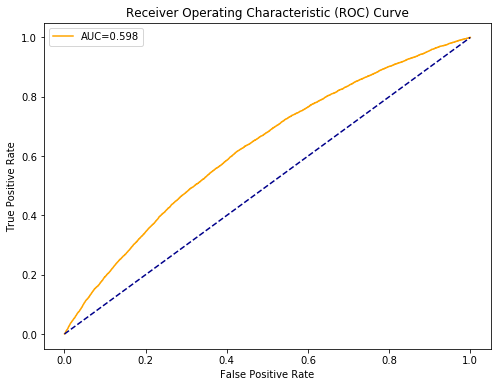

In [377]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_test,y_pred_prob)
probs = model.predict_proba(X_test)[:,1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)

In [146]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
   # print(kstable)
    
    #Display KS
    from colorama import Fore
  #  print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [378]:
validation_data = X_test.copy()
validation_data['TARGET'] = 0
validation_data['PROB'] = 0
validation_data['TARGET'] = y_test
validation_data['PROB'] = model.predict_proba(X_test)[:,1]
ks(validation_data, 'TARGET', 'PROB')

,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.603757,0.999991,1340,7886,17.99%,9.30%,17.99%,9.30%,8.7
2,0.557662,0.603756,1102,8123,14.80%,9.58%,32.79%,18.88%,13.9
3,0.524304,0.557660,1005,8220,13.49%,9.69%,46.28%,28.57%,17.7
4,0.495333,0.524303,791,8435,10.62%,9.95%,56.90%,38.52%,18.4
5,0.466650,0.495332,737,8488,9.90%,10.01%,66.80%,48.52%,18.3
6,0.437481,0.466645,644,8581,8.65%,10.12%,75.44%,58.64%,16.8
7,0.405959,0.437479,562,8664,7.55%,10.22%,82.99%,68.86%,14.1
8,0.368863,0.405959,500,8725,6.71%,10.29%,89.70%,79.15%,10.6
9,0.318860,0.368860,414,8811,5.56%,10.39%,95.26%,89.54%,5.7
